<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/bilstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 47s 77ms/step - loss: 0.6561 - accuracy: 0.5905 - val_loss: 0.3699 - val_accuracy: 0.8396
Epoch 2/100
176/176 [==============================] - 13s 72ms/step - loss: 0.3157 - accuracy: 0.8695 - val_loss: 0.3126 - val_accuracy: 0.8676
Epoch 3/100
176/176 [==============================] - 13s 72ms/step - loss: 0.2220 - accuracy: 0.9153 - val_loss: 0.2928 - val_accuracy: 0.8732
Epoch 4/100
176/176 [==============================] - 13s 72ms/step - loss: 0.1779 - accuracy: 0.9359 - val_loss: 0.3036 - val_accuracy: 0.8772
Epoch 5/100
176/176 [==============================] - 13s 72ms/step - loss: 0.1532 - accuracy: 0.9487 - val_loss: 0.3196 - val_accuracy: 0.8728
Epoch 6/100
176/176 [==============================] - 13s 72ms/step - loss: 0.1256 - accuracy: 0.9575 - val_loss: 0.3279 - val_accuracy: 0.8696
Epoch 7/100
176/176 [==============================] - 13s 72ms/step - loss: 0.0946 - accuracy: 0.9679 - val_loss

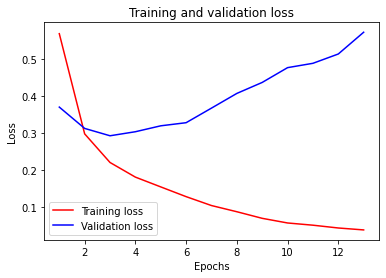

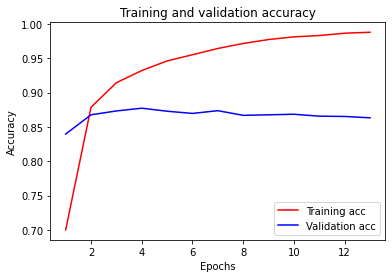

              precision    recall  f1-score   support

           0      0.889     0.871     0.880     12500
           1      0.873     0.891     0.882     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 16s 78ms/step - loss: 0.6569 - accuracy: 0.5863 - val_loss: 0.3664 - val_accuracy: 0.8464
Epoch 2/100
176/176 [==============================] - 13s 74ms/step - loss: 0.3091 - accuracy: 0.8742 - val_loss: 0.2895 - val_accuracy: 0.8820
Epoch 3/100
176/176 [==============================] - 13s 75ms/step - loss: 0.2207 - accuracy: 0.9137 - val_loss: 0.2799 - val_accuracy: 0.8844
Epoch 4/100
176/176 [==============================] - 13s 75ms/step - loss: 0.1850 - accuracy: 0.9317 - val_loss: 0.2957 - val_accuracy: 0.8832
Epoch 5/100
176/176 [==============================] - 13s 75ms/step - loss

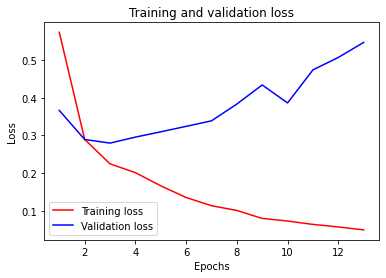

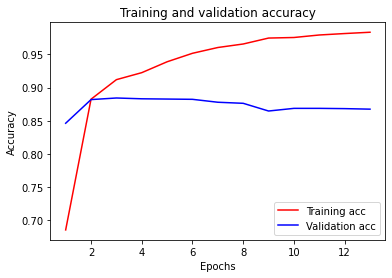

              precision    recall  f1-score   support

           0      0.852     0.913     0.881     12500
           1      0.906     0.841     0.873     12500

    accuracy                          0.877     25000
   macro avg      0.879     0.877     0.877     25000
weighted avg      0.879     0.877     0.877     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 17s 79ms/step - loss: 0.6665 - accuracy: 0.5719 - val_loss: 0.3701 - val_accuracy: 0.8368
Epoch 2/100
176/176 [==============================] - 13s 75ms/step - loss: 0.3283 - accuracy: 0.8617 - val_loss: 0.2758 - val_accuracy: 0.8872
Epoch 3/100
176/176 [==============================] - 13s 75ms/step - loss: 0.2359 - accuracy: 0.9062 - val_loss: 0.2962 - val_accuracy: 0.8824
Epoch 4/100
176/176 [==============================] - 13s 75ms/step - loss: 0.1898 - accuracy: 0.9281 - val_loss: 0.2762 - val_accuracy: 0.8800
Epoch 5/100
176/176 [==============================] - 13s 74ms/step - loss

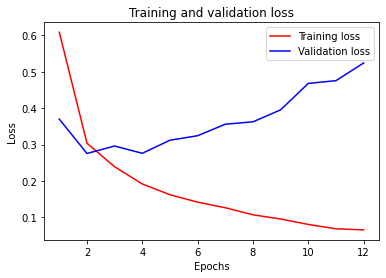

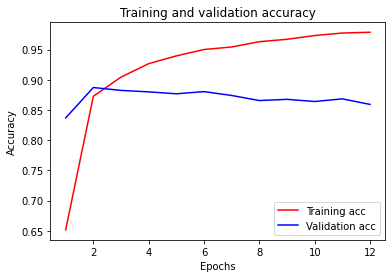

              precision    recall  f1-score   support

           0      0.888     0.874     0.881     12500
           1      0.876     0.890     0.883     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 17s 79ms/step - loss: 0.6508 - accuracy: 0.5816 - val_loss: 0.3098 - val_accuracy: 0.8688
Epoch 2/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2791 - accuracy: 0.8851 - val_loss: 0.2896 - val_accuracy: 0.8796
Epoch 3/100
176/176 [==============================] - 13s 75ms/step - loss: 0.2195 - accuracy: 0.9169 - val_loss: 0.2862 - val_accuracy: 0.8720
Epoch 4/100
176/176 [==============================] - 13s 75ms/step - loss: 0.1854 - accuracy: 0.9340 - val_loss: 0.2951 - val_accuracy: 0.8808
Epoch 5/100
176/176 [==============================] - 13s 75ms/step - loss

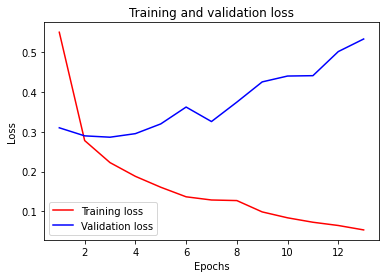

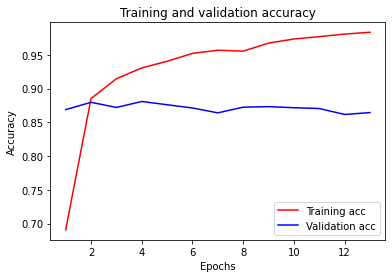

              precision    recall  f1-score   support

           0      0.874     0.882     0.878     12500
           1      0.881     0.873     0.877     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 17s 80ms/step - loss: 0.6485 - accuracy: 0.5837 - val_loss: 0.3348 - val_accuracy: 0.8556
Epoch 2/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2764 - accuracy: 0.8884 - val_loss: 0.2936 - val_accuracy: 0.8744
Epoch 3/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2178 - accuracy: 0.9182 - val_loss: 0.2894 - val_accuracy: 0.8844
Epoch 4/100
176/176 [==============================] - 13s 76ms/step - loss: 0.1854 - accuracy: 0.9319 - val_loss: 0.2932 - val_accuracy: 0.8828
Epoch 5/100
176/176 [==============================] - 13s 76ms/step - loss

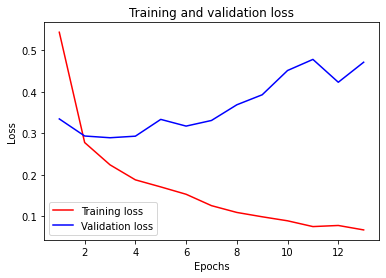

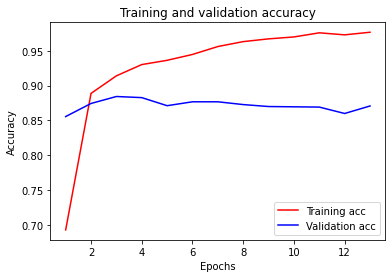

              precision    recall  f1-score   support

           0      0.904     0.845     0.874     12500
           1      0.855     0.910     0.881     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.877     25000
weighted avg      0.879     0.878     0.877     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 17s 80ms/step - loss: 0.6230 - accuracy: 0.6222 - val_loss: 0.3047 - val_accuracy: 0.8672
Epoch 2/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2633 - accuracy: 0.8934 - val_loss: 0.2764 - val_accuracy: 0.8840
Epoch 3/100
176/176 [==============================] - 13s 75ms/step - loss: 0.2015 - accuracy: 0.9216 - val_loss: 0.2887 - val_accuracy: 0.8896
Epoch 4/100
176/176 [==============================] - 13s 76ms/step - loss: 0.1783 - accuracy: 0.9324 - val_loss: 0.2874 - val_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 13s 76ms/step - loss

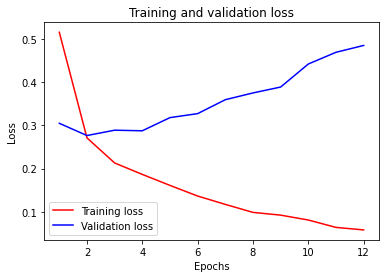

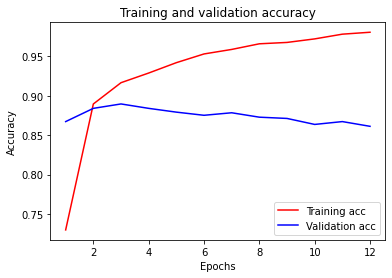

              precision    recall  f1-score   support

           0      0.861     0.897     0.878     12500
           1      0.892     0.855     0.873     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 17s 80ms/step - loss: 0.6474 - accuracy: 0.5983 - val_loss: 0.3173 - val_accuracy: 0.8720
Epoch 2/100
176/176 [==============================] - 14s 77ms/step - loss: 0.2961 - accuracy: 0.8797 - val_loss: 0.2782 - val_accuracy: 0.8920
Epoch 3/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2259 - accuracy: 0.9125 - val_loss: 0.2895 - val_accuracy: 0.8876
Epoch 4/100
176/176 [==============================] - 13s 76ms/step - loss: 0.1880 - accuracy: 0.9292 - val_loss: 0.2892 - val_accuracy: 0.8908
Epoch 5/100
176/176 [==============================] - 13s 76ms/step - loss

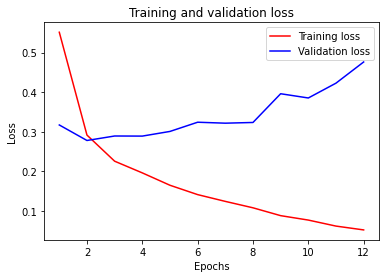

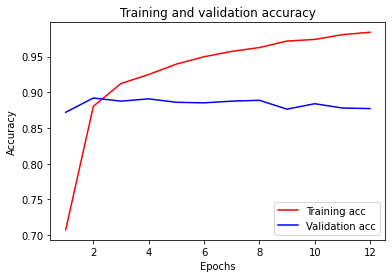

              precision    recall  f1-score   support

           0      0.869     0.884     0.876     12500
           1      0.882     0.867     0.874     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 17s 80ms/step - loss: 0.6738 - accuracy: 0.5485 - val_loss: 0.6550 - val_accuracy: 0.7652
Epoch 2/100
176/176 [==============================] - 13s 77ms/step - loss: 0.4981 - accuracy: 0.7700 - val_loss: 0.3003 - val_accuracy: 0.8752
Epoch 3/100
176/176 [==============================] - 14s 77ms/step - loss: 0.2691 - accuracy: 0.8973 - val_loss: 0.2723 - val_accuracy: 0.8948
Epoch 4/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2177 - accuracy: 0.9198 - val_loss: 0.2766 - val_accuracy: 0.8860
Epoch 5/100
176/176 [==============================] - 14s 77ms/step - loss

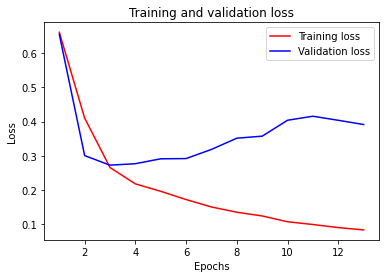

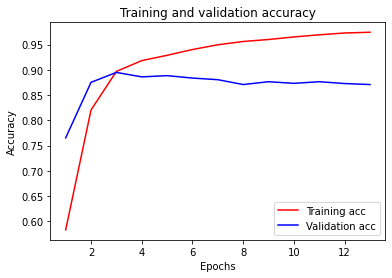

              precision    recall  f1-score   support

           0      0.886     0.877     0.882     12500
           1      0.878     0.888     0.883     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 17s 81ms/step - loss: 0.6446 - accuracy: 0.5938 - val_loss: 0.3312 - val_accuracy: 0.8600
Epoch 2/100
176/176 [==============================] - 14s 77ms/step - loss: 0.2959 - accuracy: 0.8789 - val_loss: 0.2907 - val_accuracy: 0.8760
Epoch 3/100
176/176 [==============================] - 14s 77ms/step - loss: 0.2207 - accuracy: 0.9122 - val_loss: 0.2627 - val_accuracy: 0.8884
Epoch 4/100
176/176 [==============================] - 14s 77ms/step - loss: 0.1865 - accuracy: 0.9333 - val_loss: 0.2759 - val_accuracy: 0.8892
Epoch 5/100
176/176 [==============================] - 14s 77ms/step - loss

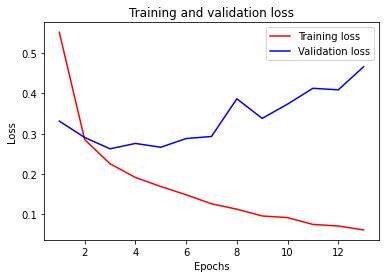

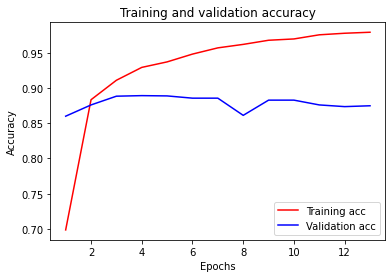

              precision    recall  f1-score   support

           0      0.886     0.876     0.881     12500
           1      0.878     0.887     0.882     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 17s 81ms/step - loss: 0.6479 - accuracy: 0.6022 - val_loss: 0.4956 - val_accuracy: 0.7684
Epoch 2/100
176/176 [==============================] - 14s 77ms/step - loss: 0.4371 - accuracy: 0.8092 - val_loss: 0.2886 - val_accuracy: 0.8876
Epoch 3/100
176/176 [==============================] - 13s 77ms/step - loss: 0.2761 - accuracy: 0.8899 - val_loss: 0.2803 - val_accuracy: 0.8868
Epoch 4/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2129 - accuracy: 0.9190 - val_loss: 0.2762 - val_accuracy: 0.8880
Epoch 5/100
176/176 [==============================] - 13s 76ms/step - los

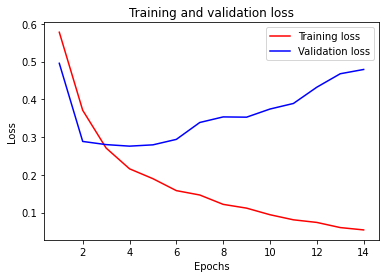

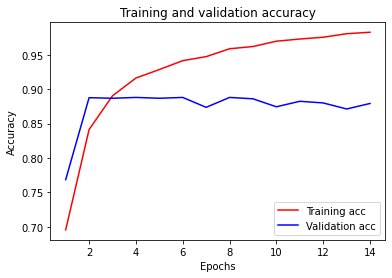

              precision    recall  f1-score   support

           0      0.863     0.905     0.883     12500
           1      0.900     0.856     0.877     12500

    accuracy                          0.880     25000
   macro avg      0.881     0.880     0.880     25000
weighted avg      0.881     0.880     0.880     25000


Average accuracy: 0.8792 (+/- 0.0026)
Average loss: 0.2883 (+/- 0.0036)
Average F1: 0.8787 (+/- 0.0041)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(units=64, activation="relu"),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
